In [ ]:
import pandas as pd
import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [180]:
data = pd.read_csv('../data/processed/uber_data_transformed.csv') 
# print(data.head())

In [ ]:
Q1_distance = data['trip_distance_miles'].quantile(0.10)  # 10th percentile
Q3_distance = data['trip_distance_miles'].quantile(0.90)  # 90th percentile

IQR_distance = Q3_distance - Q1_distance
data = data[(data['trip_distance_miles'] >= (Q1_distance - 1.5 * IQR_distance)) & 
            (data['trip_distance_miles'] <= (Q3_distance + 1.5 * IQR_distance))]

print(f"Data numbers after filter: {data.shape}")

Data shape after extreme outlier removal: (195344, 13)


In [182]:
sns.set(style="whitegrid") 
palette = sns.color_palette("Set2")

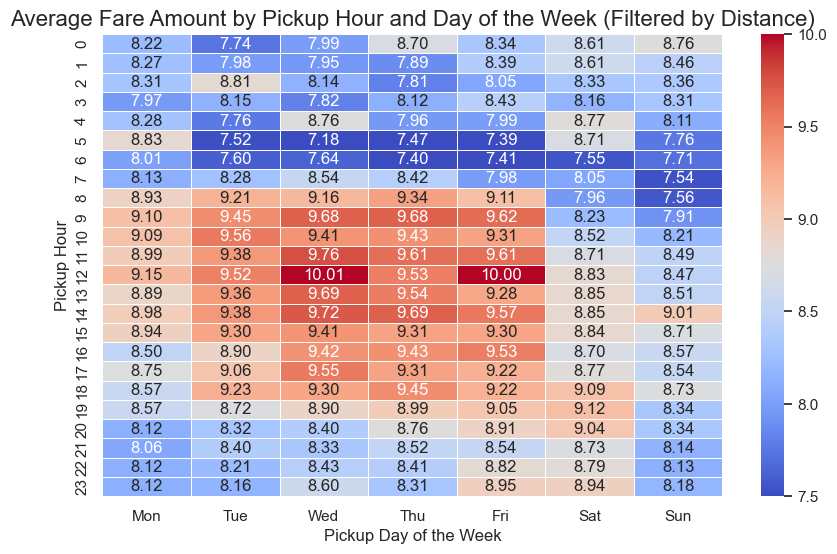

In [326]:
# Average Fare (HOD,DOW) Heatmap filtered by milage 1-2 miles to ensure accuracy
min_miles = 1  
max_miles = 2  
filtered_data = data[(data['trip_distance_miles'] >= min_miles) & (data['trip_distance_miles'] <= max_miles)]

heatmap_data = (
    filtered_data.groupby(['pickup_hour', 'pickup_day_of_week'])['fare_amount']
    .mean()
    .unstack()  
)
heatmap_data = heatmap_data.sort_index()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", linewidths=.5, cmap='coolwarm', vmin=7.5, vmax=10)
plt.title('Average Fare Amount by Pickup Hour and Day of the Week (Filtered by Distance)', fontsize=16)
plt.xlabel('Pickup Day of the Week', fontsize=12)
plt.ylabel('Pickup Hour', fontsize=12)
plt.xticks(ticks=np.arange(7) + 0.5, labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()

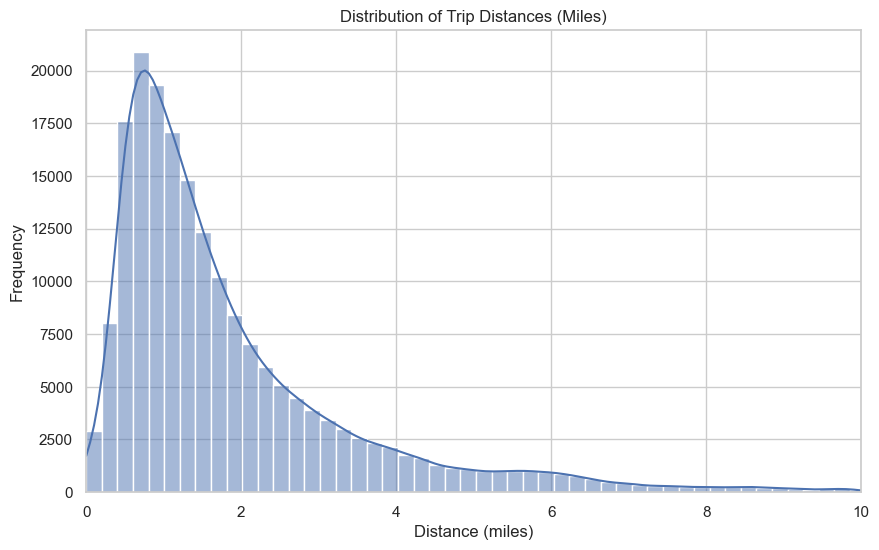

count    189695.000000
mean          1.851707
std           1.605780
min           0.000052
25%           0.784557
50%           1.324939
75%           2.334983
max          10.055819
Name: trip_distance_miles, dtype: float64


In [250]:
filtered_data = data[(data['trip_distance_miles'] > 0) & (data['fare_amount'] > 0)]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['trip_distance_miles'], bins=50, kde=True)
plt.title('Distribution of Trip Distances (Miles)')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.xlim(left=0, right=10)
plt.ylim(bottom=0)
data.head(500)
plt.show()
print(filtered_data['trip_distance_miles'].describe())

/var/folders/j4/17z4p3p138nbr3q0d5tr3kh40000gn/T/ipykernel_35733/17890472.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='trip_distance_miles', y='fare_amount', data=filtered_data, palette=palette)


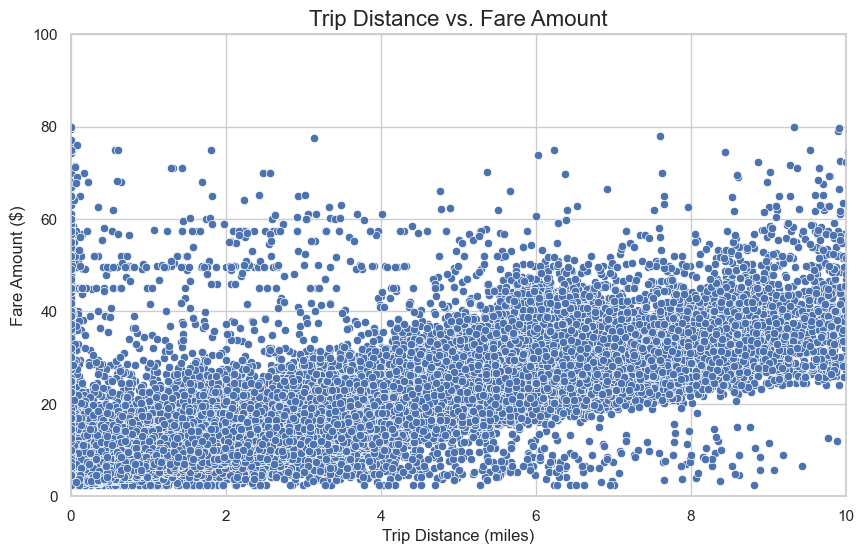

In [362]:
# # Scatter Plot
plt.figure(figsize=(10, 6))
min_fare = 2
max_fare = 80
filtered_data = data[(data['fare_amount'] >= min_fare) & (data['fare_amount'] <= max_fare)]
sns.scatterplot(x='trip_distance_miles', y='fare_amount', data=filtered_data, palette=palette)
plt.title('Trip Distance vs. Fare Amount', fontsize=16)
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.xlim(left=0, right=10)
plt.ylim(bottom=0,top=100)
plt.show()

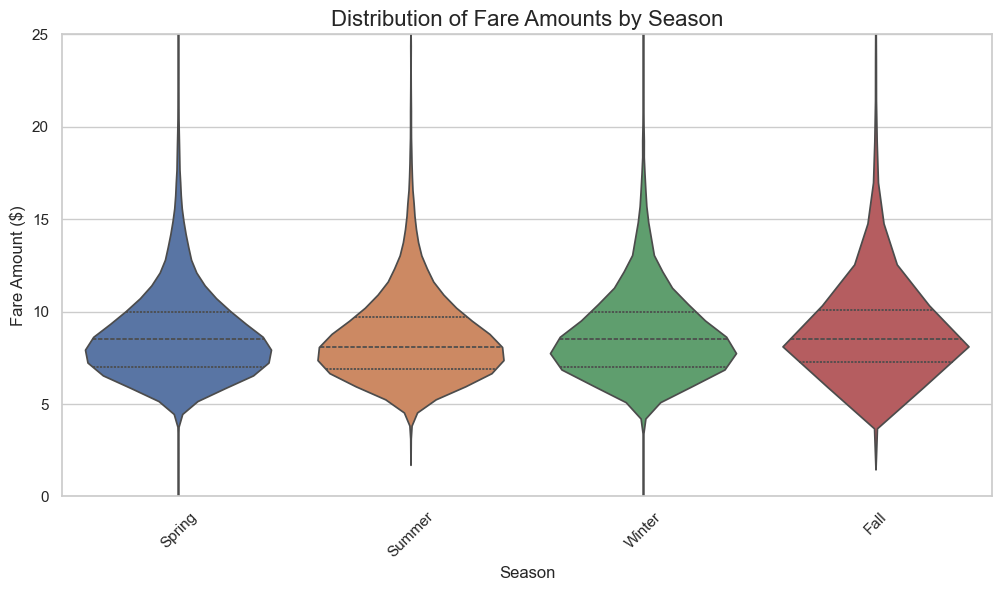

In [324]:
# Seasons Violin Plot
min_miles = 1  
max_miles = 2
filtered_data = data[(data['trip_distance_miles'] >= min_miles) & (data['trip_distance_miles'] <= max_miles)]
plt.figure(figsize=(12, 6))
sns.violinplot(x='season', y='fare_amount', hue='season', data=filtered_data, inner='quartile')
plt.title('Distribution of Fare Amounts by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(bottom=0,top=25)
plt.show()

# NOTE INFO
# WE CAN SEE THAT FALL HAS THE HIGHEST AVERAGE FARE AND WINTER IS SLIGHTLY THE LOWEST WHICH IS INTERESTING  
# MAYBE WE CAN ASSUME PEOPLE WILL MORE OFTEN THEN NOT TAKE SHORTER UBER RIDES IN THE WINTER DUE TO WEATHER 
# WHICH COULD EXPLAIN THE AVERAGE LOWER FARES OF THOSE SHORTER RIDES, IT ALSO EXPLAINS FALL BEING THE HEIGHEST
# SUGGESTING PEOPLE WOULD USUALLY TAKE CONSISTANTLY LONGER RIDES 

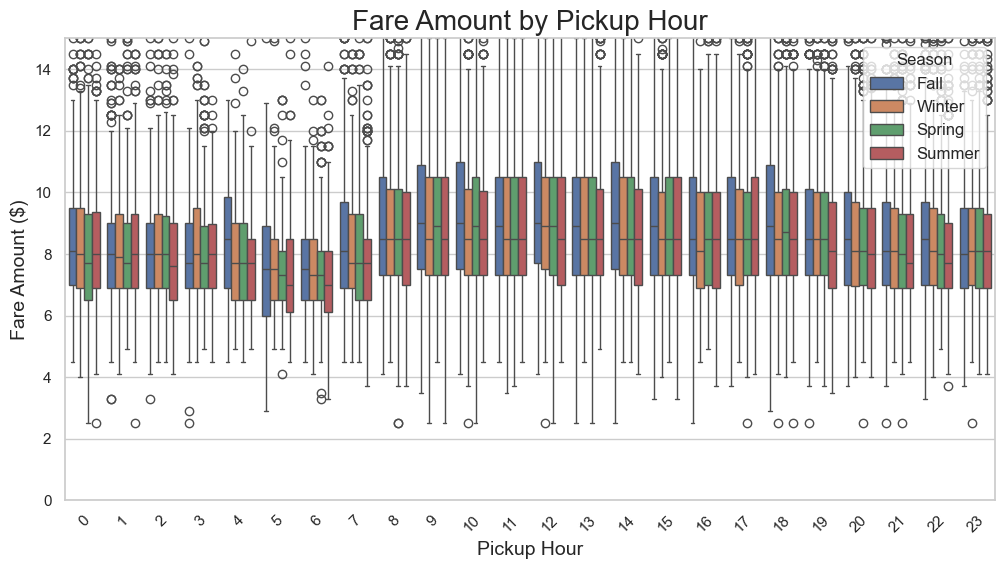

In [322]:
plt.figure(figsize=(12, 6))
min_miles = 1  
max_miles = 2  
filtered_data = data[(data['trip_distance_miles'] >= min_miles) & (data['trip_distance_miles'] <= max_miles)]
sns.boxplot(x='pickup_hour', y='fare_amount', hue='season', data=filtered_data, dodge=True)
plt.title('Fare Amount by Pickup Hour', fontsize=20)
plt.xlabel('Pickup Hour', fontsize=14)
plt.ylabel('Fare Amount ($)', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 15)  
plt.legend(title='Season', loc='upper right', fontsize='medium', frameon=True)
plt.show()

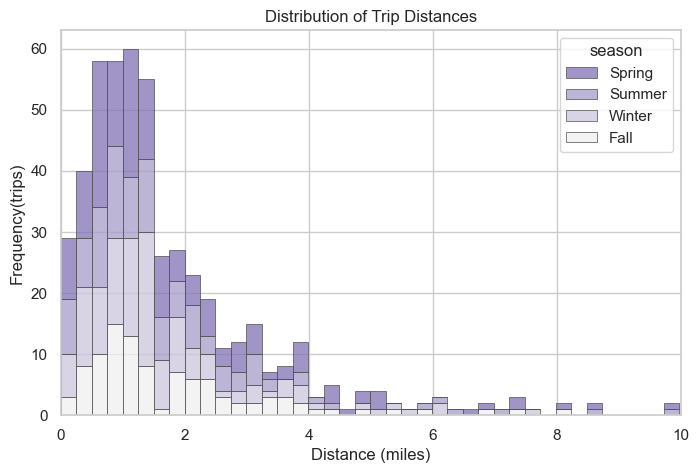

In [ ]:
# Trip Distance to fare Histogram 
plt.figure(figsize=(8, 5))
sns.histplot(data = data.head(500), x = 'trip_distance_miles', 
    binwidth= .25,
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5, hue="season",
    multiple="stack",)
plt.title('Distribution of Trip Distances')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency(trips)')
plt.xlim(left=0, right=10)
plt.ylim(bottom=0)
data.head(500)
plt.show()

In [ ]:
# THIS WAS THE MAP WE DONT HAVE TIME FOR DONT WORRY ABOUT IT FOR NOW



# 
# def create_map(data):
#     """
#     Create a map showing the pickup and drop-off locations.

#     Parameters:
#         data (DataFrame): The Uber trip data to visualize.

#     Returns:
#         folium.Map: A map with pickup and drop-off points.
#     """
#     # Initialize map centered around the mean coordinates
#     m = folium.Map(location=[data['pickup_latitude'].mean(), data['pickup_longitude'].mean()], zoom_start=12)

#     # Add markers for pickup locations
#     for idx, row in data.iterrows():
#         folium.Marker(
#             location=(row['pickup_latitude'], row['pickup_longitude']),
#             popup=f"Pickup: {row['passenger_count']} passengers\nFare: ${row['fare_amount']:.2f}",
#             icon=folium.Icon(color='blue')
#         ).add_to(m)

#         # Optionally add drop-off locations
#         folium.Marker(
#             location=(row['dropoff_latitude'], row['dropoff_longitude']),
#             popup="Dropoff",
#             icon=folium.Icon(color='red')
#         ).add_to(m)

#     return m

# # Create and save the map
# uber_map = create_map(data)
# uber_map.save('uber_rides_map.html')

# print("Map with pickups and drop-offs has been created and saved as 'uber_rides_map.html'.")